In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
data = pd.read_csv('./data/data_prep.csv')

In [38]:
data.head()

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country,country_corrected
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0.0,United Arab Emirates,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,0.0,United Arab Emirates,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,1000.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0.0,Oman,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,1000.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,2.0,United Kingdom,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,1000.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,2.0,United Kingdom,United Kingdom


In [39]:
# Show cols name
print(data.columns)

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country', 'country_corrected'],
      dtype='object')


### Dropping unnecessary columns

In [45]:
# Drop the following columns: business_id, timezone, place_id, place_link, state, Friday_morning,
# Friday_afternoon ... Thursday_evening, geo_cluster
data = data.drop(columns=['business_id', 'timezone', 'place_id', 'place_link', 'state', 
        'Friday_morning', 'Friday_afternoon', 'Friday_evening', 'Saturday_morning',
       'Saturday_afternoon', 'Saturday_evening', 'Sunday_morning',
       'Sunday_afternoon', 'Sunday_evening', 'Monday_morning',
       'Monday_afternoon', 'Monday_evening', 'Tuesday_morning',
       'Tuesday_afternoon', 'Tuesday_evening', 'Wednesday_morning',
       'Wednesday_afternoon', 'Wednesday_evening', 'Thursday_morning',
       'Thursday_afternoon', 'Thursday_evening','geo_cluster'])

data.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city',
       'verified', 'country', 'country_corrected'],
      dtype='object')

### Transforming some other columns to Binary

In [46]:
#  phone number to 0/1, website to 0/1,  (depedning on the length is bigger than 2 or its value is equal "Unknown")
#  full_adress to 0/1, 

data['phone_number'] = data['phone_number'].apply(lambda x: 0 if x == "Unknown" else 1)
data['website'] = data['website'].apply(lambda x: 0 if x == "Unknown" else 1)
data['full_address'] = data['full_address'].apply(lambda x: 0 if x == "Unknown" else 1)


Text(0.5, 1.0, 'Full address')

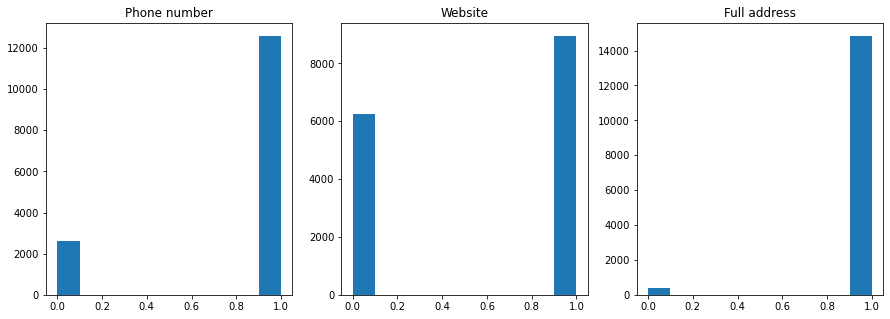

In [50]:
# Plot phone number, website and full adress histograms:
# Plot in one figure. Give titles to each plot

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(data['phone_number'])
axs[0].set_title('Phone number')
axs[1].hist(data['website'])
axs[1].set_title('Website')
axs[2].hist(data['full_address'])
axs[2].set_title('Full address')

### Note: some columns that are necessary only for visualization
- name
- city
- country
- country_corrected

They will stay in the dataset, but to be dropped before the clustering process.

<br>

Columns to be further engineered:
- types
- opening hours (Monday - Sunday)

<br>

Columns that are already ok:
- latitude
- longitude
- review_count
- rating
- verified
- phone_number
- website
- full_address

In [63]:
data["Monday"].value_counts().index[0:100]

Index(['Hours not available', 'Open 24 hours', 'Closed', '10 AM-10 PM',
       '9 AM-6 PM', '9 AM-5 PM', '8 AM-5 PM', '9 AM-9 PM', '8 AM-8 PM',
       '10 AM-6 PM', '8 AM-6 PM', '9 AM-10 PM', '8 AM-12 AM', '8 AM-10 PM',
       '9 AM-7 PM', '10 AM-8 PM', '9 AM-12 AM', '10 AM-11 PM', '10 AM-7 PM',
       '10 AM-9 PM', '9 AM-11 PM', '10 AM-5 PM', '9 AM-8 PM', '10 AM-12 AM',
       '8 AM-11 PM', '7 AM-12 AM', '7 AM-11 PM', '8 AM-1 PM', '8 AM-9 PM',
       '9:30 AM-9:30 PM', '9 AM-5:30 PM', '9 AM-1 PM', '7 AM-10 PM',
       '8 AM-7 PM', '8 AM-4 PM', '7 AM-7 PM', '6 AM-12 AM', '8:30 AM-6 PM',
       '8:30 AM-5 PM', '8:30 AM-5:30 PM', '9 AM-11:30 PM', '8 AM-2 AM',
       '7 AM-6 PM', '6 AM-11 PM', '11 AM-12 AM', '6 AM-10 PM', '9 AM-4 PM',
       '8 AM-5:30 PM', '11 AM-6 PM', '10 AM-2 AM', '7:30 AM-3:30 PM',
       '9 AM-1 AM', '12 PM-12 AM', '8 AM-11:30 PM', '9 AM-2 AM', '7 AM-5 PM',
       '11 AM-11 PM', '1-5:30 PM', '10 AM-4 PM', '11 AM-7 PM', '9 AM-2 PM',
       '10 AM-1 AM', '10 AM-11:30 

In [69]:
s = data.sample(200)

import pandas as pd
import numpy as np
import re


# Definiowanie funkcji pomocniczych
def get_time_segments(opening_hours):
    # Definiowanie segmentów czasowych
    morning = (6, 12)
    afternoon = (12, 18)
    evening = (18, 24)
    
    segments = {
        'morning': np.nan,
        'afternoon': np.nan,
        'evening': np.nan
    }
    
    if opening_hours in ['Hours not available']:
        return segments
    elif opening_hours == 'Closed':
        return {segment: 0 for segment in segments}
    elif opening_hours == 'Open 24 hours':
        return {segment: 1 for segment in segments}
    
    # Obsługa godzin bez AM/PM
    if 'AM' not in opening_hours and 'PM' not in opening_hours:
        opening_hours = opening_hours.replace(' ', ' AM-') + ' PM'
    
    times = re.findall(r'(\d{1,2}:\d{2}|\d{1,2}) (AM|PM)', opening_hours)
    if len(times) == 2:
        start_hour, start_period = times[0]
        end_hour, end_period = times[1]
        
        start_hour = int(start_hour.split(':')[0]) + (12 if start_period == 'PM' and int(start_hour.split(':')[0]) != 12 else 0)
        end_hour = int(end_hour.split(':')[0]) + (12 if end_period == 'PM' and int(end_hour.split(':')[0]) != 12 else 0)
        
        if morning[0] <= start_hour < morning[1]:
            segments['morning'] = 1
        if afternoon[0] <= start_hour < afternoon[1]:
            segments['afternoon'] = 1
        if evening[0] <= start_hour < evening[1]:
            segments['evening'] = 1
    return segments

# Przetwarzanie kolumn dla każdego dnia tygodnia
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']: 
    day_segments = s[day].apply(get_time_segments)
    day_df = pd.DataFrame(day_segments.tolist(), index=s.index)
    s[f'{day}_morning'] = day_df['morning']
    s[f'{day}_afternoon'] = day_df['afternoon']
    s[f'{day}_evening'] = day_df['evening']

# Usunięcie oryginalnych kolumn godzin otwarcia
s.drop(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)  

s

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,city,...,Thursday_evening,Friday_morning,Friday_afternoon,Friday_evening,Saturday_morning,Saturday_afternoon,Saturday_evening,Sunday_morning,Sunday_afternoon,Sunday_evening
4978,1,Aquadeco,1,52.361820,6.616842,331.0,4.5,1,"Aquarium, Tropical fish store, Aquarium shop",Almelo,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.0,0.0,0.0
4432,1,William Russell,1,25.264773,55.321831,32.0,4.4,1,"Health insurance agency, Insurance agency, Lif...",Dubai,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9048,1,Bewl Water,1,51.077872,0.387030,1000.0,4.5,1,"Campground, Cafe, Country park, Cycling park, ...",Wadhurst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14302,1,Charlotte Flowers شارلوت للزهور,1,25.318576,55.380224,71.0,4.8,1,Florist,Sharjah,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
9613,1,Ajman Bank ATM - Al Hoot Center,1,25.395779,55.492446,32.0,4.4,1,ATM,Ajman,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,1,Crystal Plaza Hotel,1,25.342874,55.394686,1000.0,3.4,0,"Hotel, Restaurant",Sharjah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11034,0,Mosque مسجد,1,25.311564,55.408800,32.0,4.4,0,Mosque,Sharjah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,1,Bombay Bistro Restaurant,1,25.297073,55.366029,318.0,4.4,1,"Takeout Restaurant, Cafe, Chinese restaurant, ...",Dubai,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
8949,1,Interstate State Park,1,45.393667,-92.668991,1000.0,4.8,1,"Campground, State park, Canoeing area, Rock cl...",Taylors Falls,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
s[['Monday_morning']].value_counts()

Monday_morning
1.0               112
0.0                 3
dtype: int64

In [71]:
s[['Monday_morning']].isna().sum()

Monday_morning    85
dtype: int64

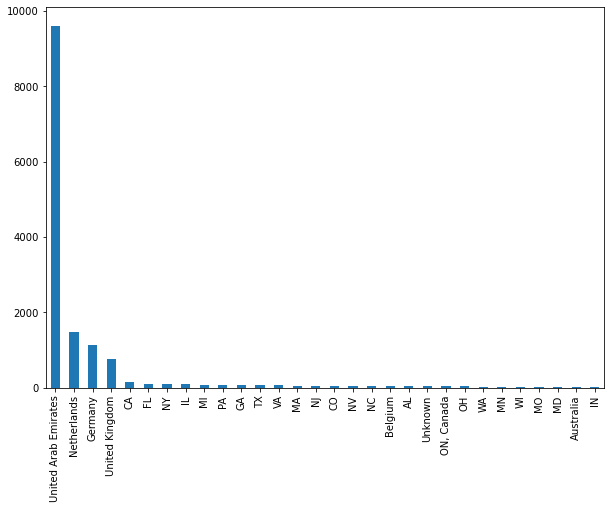

In [41]:
# plot country distribution
figure = plt.figure(figsize=(10, 7))
data['country'].value_counts().head(30).plot(kind='bar')
plt.show()

In [228]:
# %pip install geopy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Geopy is slow, as we already know.

In [28]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter

# # Inicjalizacja geolokalizatora
# geolocator = Nominatim(user_agent="geoapiExercises")

# # Funkcja do uzyskania nazwy kraju na podstawie współrzędnych
# def get_country(lat, lon):
#     try:
#         location = geolocator.reverse((lat, lon), language='en')
#         address = location.raw['address']
#         country = address.get('country', '')
#         return country
#     except:
#         return None

# # Używanie RateLimiter do ograniczenia liczby zapytań na sekundę
# geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# s = data.sample(3)
# # Uzyskiwanie nazw krajów dla każdej pary współrzędnych
# country_names = s.apply(lambda row: get_country(row['latitude'], row['longitude']), axis=1)

# print(country_names)

758      None
9294     None
14614    None
dtype: object


In [51]:
#divide data to test,train validate with seed 42
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_validate = train_test_split(df_train, test_size=0.25, random_state=42)

In [52]:
#describe the df_train
df_train.describe()

,phone_number,full_address,latitude,longitude,review_count,rating,website
count,9118.000000,9118.000000,9118.000000,9118.000000,9118.00000,9118.000000,9118.000000
mean,0.824304,0.976640,33.107267,24.528576,151.61417,4.283768,0.589055
std,0.380583,0.151054,12.207285,50.589459,279.55329,0.680637,0.492032
min,0.000000,0.000000,-45.577163,-150.040000,1.00000,1.000000,0.000000
25%,1.000000,1.000000,25.259958,5.279545,8.00000,4.100000,0.000000
50%,1.000000,1.000000,25.310213,55.287202,32.00000,4.400000,1.000000
75%,1.000000,1.000000,44.612694,55.370509,113.00000,4.700000,1.000000
max,1.000000,1.000000,64.413678,174.629698,1000.00000,5.000000,1.000000


## Preprocessing 'types' column

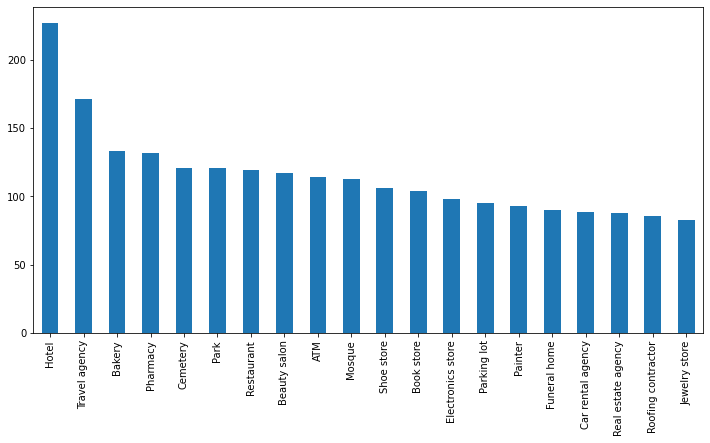

In [36]:
#prepare a plot where you show top 10 occuring types
fig = plt.figure(figsize=(12, 6))
df_train['types'].value_counts().head(20).plot(kind='bar')
plt.show()


In [234]:
# Show types which contain a comma in their name
df_train[df_train['types'].str.contains(",")]['types'].value_counts()

types
Car rental agency, Van rental agency                                                                                                                                     53
Roofing contractor, Service establishment                                                                                                                                51
Bank, ATM                                                                                                                                                                51
Park, Tourist attraction                                                                                                                                                 35
Casino, Amusement center, Gambling house                                                                                                                                 33
                                                                                                                                      

In [235]:
# Show random 5 rows where there is comma in type
df_train[df_train['types'].str.contains(",")].sample(5)

,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,types,geo_cluster,country,city,verified
12382,0,De Jong BV,Unknown,52.084187,5.082491,32.0,4.4,Europe/Amsterdam,1,"Roofing contractor, Construction company, Serv...",2.0,United Arab Emirates,Dubai,True
13487,1,Maita Toyota of Sacramento,"Maita Toyota of Sacramento, 2500 Auburn Blvd, ...",38.629049,-121.403086,273.0,3.9,America/Los_Angeles,1,"Toyota dealer, Car dealer, Car finance and loa...",3.0,CA,Sacramento,True
3090,1,Bab Marka,"892H+H43 Bab Marka - Near Al Nahda Park, Al Na...",25.301386,55.377800,5.0,4.4,Asia/Dubai,0,"Shoe store, Clothing store",0.0,United Arab Emirates,Sharjah,False
799,1,Geldmaat,"Geldmaat, Seinstraat 13, 1223 DE Hilversum, Ne...",52.232379,5.191846,32.0,4.4,Europe/Amsterdam,1,"Bank, ATM",2.0,Netherlands,Hilversum,True
5780,1,Fabyland,Fabyland - 100a Abu Amr Al Basri St - Al Rahma...,25.329355,55.603321,35.0,4.3,Asia/Dubai,1,"Amusement park, Indoor playground",0.0,United Arab Emirates,Sharjah,True


In [236]:
# Show all the values from 'types' column that do NOT contain a comma
df_train[~df_train['types'].str.contains(",")]['types'].value_counts()

types
Hotel                     227
Travel agency             171
Bakery                    133
Pharmacy                  132
Cemetery                  121
                         ... 
Formal wear store           1
Cremation service           1
General store               1
Forensic consultant         1
Traffic police station      1
Name: count, Length: 460, dtype: int64

In [237]:
#%pip install sentence_transformers

In [250]:
# Get all type values from df_train, split by comma if sth is there, strip, and then get unique values
types = df_train['types'].apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: [i.strip() for i in x]).explode().unique()
len(types)

1627

### Embeddings for 'types' column and visualisations

/home/iwaniukooo/.local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


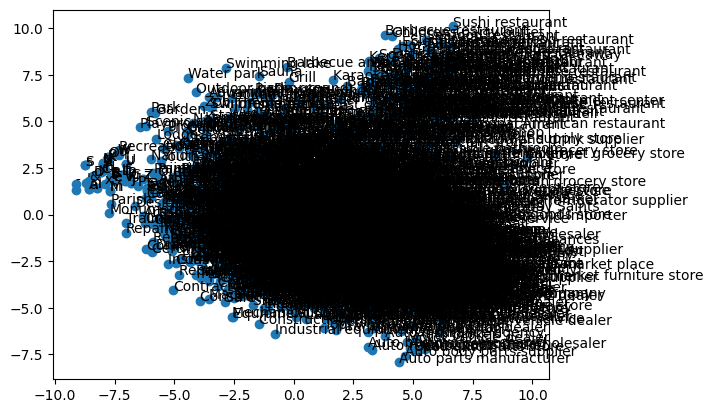

In [251]:
# import sbert, get all unique values of type which do not contain comma, prepare embeddings for them, do PCA and plot the result
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# unique_types = df_train[~df_train['types'].str.contains(",")]['types'].unique()
unique_types=df_train['types'].apply(lambda x: x.split(",") if "," in x else x).apply(lambda x: [i.strip() for i in x]).explode().unique()
embeddings = model.encode(unique_types)
pca = PCA(n_components=2)
pca.fit(embeddings)
embeddings_pca = pca.transform(embeddings)
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1])
for i, txt in enumerate(unique_types):
    plt.annotate(txt, (embeddings_pca[i,0], embeddings_pca[i,1]))

# Embeddings of all unique types presented on 2D plot (achieved with PCA)

In [252]:
# There are 1627 unique types in total. Such as 'Department store', 'Bedding store', 'Hotel'.
unique_types,len(unique_types)

(array(['Department store', 'Bathroom supply store', 'Bedding store', ...,
        'Industrial design company', 'Dog cafe',
        'Holistic medicine practitioner'], dtype=object),
 1627)

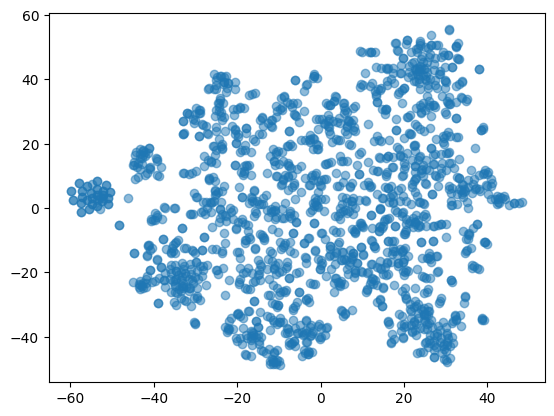

In [253]:
# Plotting embeddings of all unique types using TSNE with n_components = 2

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
embeddings_tsne = tsne.fit_transform(embeddings)
# Plot it with alpha = 0.5
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], alpha=0.5)

# for i, txt in enumerate(unique_types):
#     plt.annotate(txt, (embeddings_tsne[i,0], embeddings_tsne[i,1]))

Some groups of types form evident clusters, meaning that this types are similar in meaning.

### Get clusters from embeddings
This clusters represent more general types of places (cluster_type).

In [256]:
# Prepare k-means clustering of embeddings and show the plot of 
# k (number of clusters) vs Inertia

# Show the number of unique values without comma and save it in a variable
# unique_types = df_train[~df_train['types'].str.contains(",")]['types'].unique()
# unique_types_len = len(unique_types)
unique_types_len=len(unique_types)

from sklearn.cluster import KMeans
inertia = []
for k in range(1, unique_types_len,50 ):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)


In [255]:
# Number of unique types once again
unique_types_len

1627

Choosing the right number of clusters.

Elbow-rule:

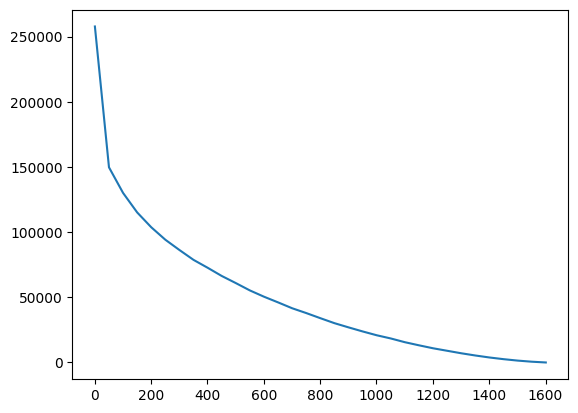

In [257]:
# Plot of k vs Inertia for number of clusters = 1, 51, 101, 151, 201, 251 ...
plt.plot(range(1, unique_types_len,50 ), inertia)
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('k vs Inertia')
plt.show()

Silhouette scores:

In [258]:
# Prepare silhoutte score for each k-means clusterization and 
# then show the plot of k vs silhoutte score.
# Here k = 2, 52, 102, 152, 202, 252 ...

from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2, unique_types_len ,50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    silhouette.append(silhouette_score(embeddings, kmeans.labels_))
#plot, give x and y labels, y axis from o to 0.5


In [263]:
len(silhouette)

33

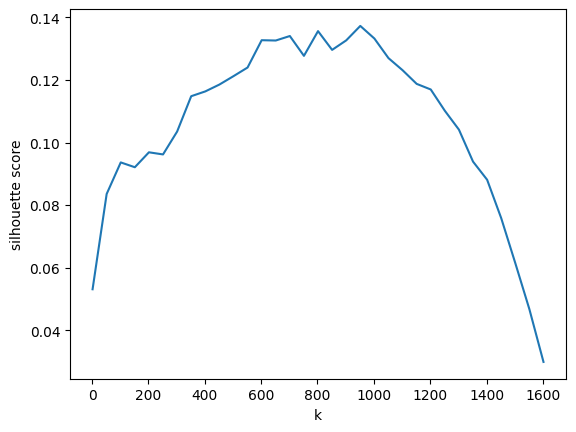

In [264]:
# Plot sillhouette for k = 2, 52, 102, 152, 202...
plt.plot(range(2, unique_types_len ,50), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('k vs silhouette score')
plt.show()


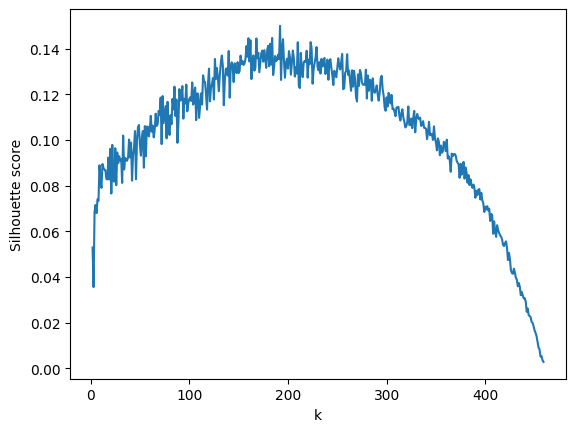

(190, 0.14993083)

In [ ]:
# Results of silhouette vs k where only some types were taken into account.
# THIS IS AN OLD VISUALISATION KEPT ONLY FOR REFERENCE !!!

# plt.plot(range(2, unique_types_len ), silhouette)
# plt.xlabel('k')
# plt.ylabel('Silhouette score')
# plt.show()
# silhouette.index(max(silhouette)), max(silhouette)


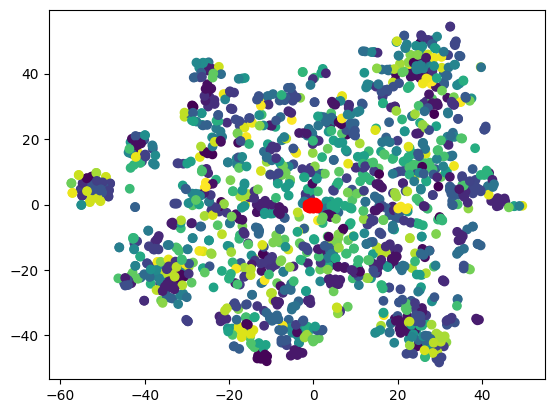

In [329]:
# Do k-means clusterization with k=600 and show the tsne plot of the embeddings with clusterization
kmeans = KMeans(n_clusters=600)
kmeans.fit(embeddings)
embeddings_tsne = tsne.fit_transform(embeddings)
#plot in and show centroids with red colour
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')

# This does not look the best. Maybe we should consider less number of clusters.
# We can also try another clustering algorithm, such as DBSCAN.
# Also, are the embeddings normalized?

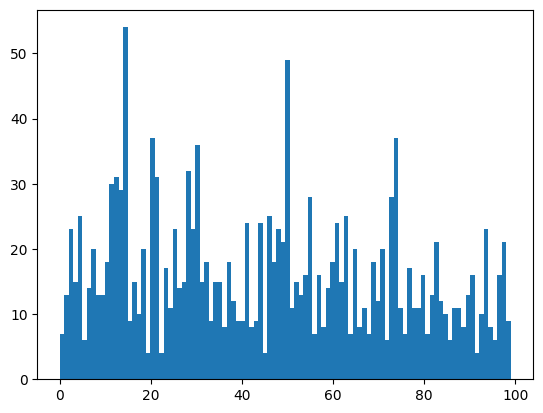

In [330]:
# Run k-kemans for k=100 and show the plot of cluster size
# This shows how big are those clusters that we formed

kmeans = KMeans(n_clusters=600)
kmeans.fit(embeddings)
plt.hist(kmeans.labels_, bins=600)
plt.show()


In [331]:
#for the 10 class with the biggest cluster show the names of the types and also print the number the claster
cluster_size = np.bincount(kmeans.labels_)
biggest_clusters = np.argsort(cluster_size)[-10:]
for cluster in biggest_clusters:
    print(cluster,unique_types[kmeans.labels_ == cluster])



13 ['Evangelical church' 'Choir' 'Catholic church' 'Church' 'Baptist church'
 'Reformed church' 'Protestant church' 'Christian church'
 'Pentecostal church' 'Religious organization' 'Apostolic church'
 'United Methodist church' 'Assemblies of God church' 'Gospel church'
 'Church of Jesus Christ of Latter-day Saints' 'Religious destination'
 'Cathedral' 'Catholic cathedral' 'Seventh-day Adventist church'
 'Non-denominational church' 'Religious institution' 'Lutheran church'
 'Rectory' 'Korean church' 'Christian book store' 'Religious book store'
 'Church of Christ' 'Methodist church' 'Orthodox church']
11 ['Ayurvedic clinic' 'Dermatologist' 'Immunologist'
 'Pain management physician' 'Surgical oncologist' 'Pain control clinic'
 'Cardiologist' 'Gynecologist' 'Emergency veterinarian service'
 'Walk-in clinic' 'Obstetrician-gynecologist' 'Diabetologist'
 'Endocrinologist' 'Fertility clinic' 'Family practice physician'
 'Bariatric surgeon' 'Vascular surgeon'
 'Alternative medicine practitio

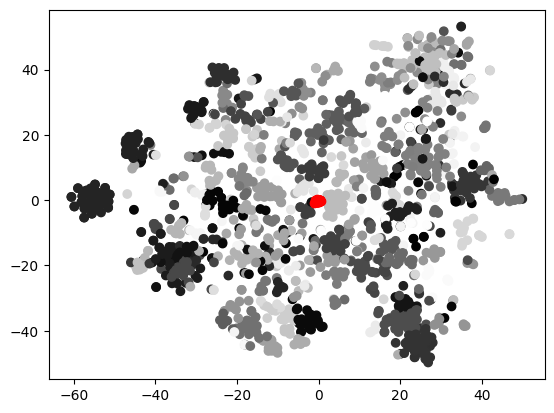

In [332]:
# For k=170 prepare tsne and show cluster but color is from white to black
# Is something wrong with the centroids? 

embeddings_tsne = tsne.fit_transform(embeddings)
plt.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], c=kmeans.labels_, cmap='gray')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red')


In [333]:
unique_types

array(['Department store', 'Bathroom supply store', 'Bedding store', ...,
       'Industrial design company', 'Dog cafe',
       'Holistic medicine practitioner'], dtype=object)

In [334]:
#unique_types
kmeans.labels_

array([94, 63, 84, ..., 41, 18, 11], dtype=int32)

In [335]:
from collections import Counter
from difflib import get_close_matches
import numpy as np

def assign_cluster(row, unique_types, clusters):
    types = [t.strip() for t in row['types'].split(',')]
    matched_types = [get_close_matches(t, unique_types.tolist(), n=1) for t in types]
    matched_clusters = [clusters[np.where(unique_types == mt[0])[0][0]] for mt in matched_types if mt]
    return Counter(matched_clusters).most_common(1)[0][0] if matched_clusters else -1

df_train['cluster_type'] = df_train.apply(lambda row: assign_cluster(row, unique_types, kmeans.labels_), axis=1)

In [336]:
# Show df_train types column where cluster is 90
df_train[df_train['cluster_type'] == 90]['types']


6436                                               Bakery
6423                                               Bakery
6305                                               Bakery
4801    Gas station, Bakery, Coffee shop, Convenience ...
6442                                   Bakery, Restaurant
                              ...                        
6290                               Bakery, Chocolate shop
6360             Bakery, American restaurant, Coffee shop
6560                                               Bakery
6415                                  Bakery, Coffee shop
6277                                               Bakery
Name: types, Length: 203, dtype: object

## Recommendations - additional stuff

In [338]:
# get 1 random row. get longitude and latitude. On df_train calculate the distance from it. show valuyes from closest to largest with the same cluster
import geopy.distance
import random
row = df_train.sample(1)
coords_1 = (row['latitude'].values[0], row['longitude'].values[0])
distances = df_train.apply(lambda x: geopy.distance.distance(coords_1, (x['latitude'], x['longitude'])).km, axis=1)
df_train['distance'] = distances


# print me please row[name,"types","latitude","longitude","cluster"]
row[['name', 'types', 'latitude', 'longitude', 'cluster']]


,name,types,latitude,longitude,cluster
1445,Zeitfueralkoholfrei,Wine store,52.12276,5.27738,99


In [339]:
df_temp = df_train[df_train['cluster'] == row['cluster'].values[0]].sort_values('distance')
df_temp.head()[['name', 'types', 'latitude', 'longitude', 'cluster','distance']]

,name,types,latitude,longitude,cluster,distance
1445,Zeitfueralkoholfrei,Wine store,52.122760,5.277380,99,0.000000
1461,Vitisime,Wine store,52.082912,5.236980,99,5.227029
1421,VillaVino,Wine store,52.171505,5.350586,99,7.384445
1462,United Drinks Europe B.V.,Wine store,52.037728,5.311009,99,9.738229
1472,Gall en Gall Hoogland,"Liquor store, Wine bar, Wine store",52.187890,5.374956,99,9.854816


## Skupiska

In [340]:
#for all lotitude, langitude search best k and plot shilouette score
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2, 100 ):
    kmeans = KMeans(n_clusters=k)
    # k menas fit pair longitude, latitude
    kmeans.fit(df_train[['longitude', 'latitude']])
    silhouette.append(silhouette_score(df_train[['longitude', 'latitude']], kmeans.labels_))
#plot, give x and y labels, y axis from o to 0.5



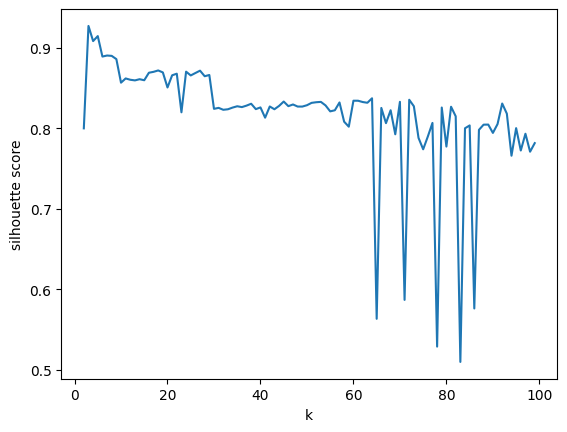

(1, 0.9268894512152706)

In [341]:
#plot shilouette score
plt.plot(range(2, 100), silhouette)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

#print max score and argument
silhouette.index(max(silhouette)), max(silhouette)





In [342]:
kmeans_geo = KMeans(n_clusters=8)
# k menas fit pair longitude, latitude
kmeans_geo.fit(df_train[['longitude', 'latitude']])

KMeans()

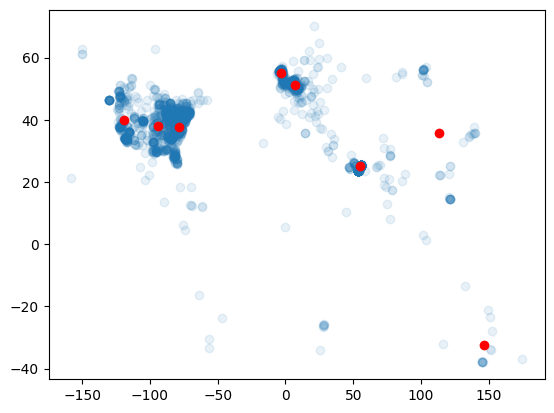

In [343]:
# on the word map show centroids of clusters
plt.scatter(df_train['longitude'], df_train['latitude'],alpha=0.1)
plt.scatter(kmeans_geo.cluster_centers_[:,0], kmeans_geo.cluster_centers_[:,1], color='red')


In [344]:
#for each row in df_train calculate the distance to the closest centroid and save it in column distance_to_centroid
distances = kmeans_geo.transform(df_train[['longitude', 'latitude']])
df_train['distance_to_centroid'] = distances.min(axis=1)



In [345]:
df_train['distance_to_centroid'].describe()

count    9116.000000
mean        1.945241
std         4.161720
min         0.006374
25%         0.179252
50%         0.323639
75%         2.015430
max        74.423653
Name: distance_to_centroid, dtype: float64

In [346]:
#show the percentage od total set where distance to centroid is bigger than 10
(df_train['distance_to_centroid'] > 10).mean()


0.03433523475208425

In [347]:
### ilosc punktow ktore sa dalej od skupiska niz 10km to 3% zbioru, srednio 1.9 std 4.17

In [230]:
# TO BE DONE AFTER WHOLE PREPROCESSING

train_set, v_t_set = train_test_split(
data, test_size=0.3, random_state=42, stratify=data["cluster_type"])

validation_set, test_set = train_test_split(
v_t_set, test_size=0.4, stratify=v_t_set["cluster_type"], random_state=42)

validation_set.to_csv("data/validation_set.csv", index=False)
test_set.to_csv("data/test_set.csv", index = False)
train_set.to_csv("data/train_set.csv", index = False)